In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [7]:
death_water = pd.read_csv('water.csv')
death_water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [10]:
death_water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [15]:
death_water = death_water.drop(columns=['Unnamed: 0'])
death_water

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

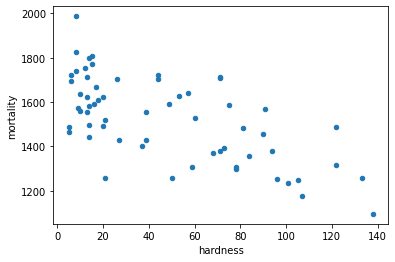

In [16]:
death_water.plot(kind='scatter', x='hardness', y='mortality')

### При первичном анализе (анализе графика) мы наблюдаем уменьшение смертности при повышении жесткости воды т.е. отдаленные признаки отрицательной корреляции, что признаться нелогично и скорее всего никак не связано

In [17]:
#Коэффициен корреляции Пирсона
death_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


### Да, наблюдается небольшая отрицательная корреляция, но она не является фактом взаимосвязи этих велечин

In [18]:
death_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


### Аналогично

In [19]:
death_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


### Данных очень мало, поэтому разбитие сделаем как 75/25

In [22]:
X = death_water[['hardness']]
y = death_water['mortality']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [24]:
X_train.shape

(45, 1)

In [25]:
y_train.shape

(45,)

### Посмотрели размеры массивов, ок да. Одинаковые

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.coef_

array([-3.63473466])

In [28]:
model.intercept_

1715.4060645799777

In [29]:
y_pred = model.predict(X_test)
y_pred

array([1457.3399036 , 1620.90296337, 1537.30406615, 1431.89676096,
       1657.25030999, 1693.59765661, 1639.07663668, 1697.23239127,
       1573.65141277, 1679.05871796, 1348.29786374, 1679.05871796,
       1664.51977932, 1373.74100637, 1580.92088209, 1668.15451398])

In [30]:
model.score(X_test, y_test)

-0.14286841549537077

### Коэффициент детерминации отрицательный, значит наша модель бесполезна (среднее предсказывает лучше)

In [45]:
y_remains = y_test - y_pred
y_remains

50    255.660096
30     83.097037
44     53.695934
13   -124.896761
26    -66.250310
40      2.402343
19   -379.076637
2    -231.232391
16    -18.651413
5    -121.058718
41   -112.297864
8     -42.058718
43   -220.519779
21      5.258994
27   -178.920882
51   -111.154514
Name: mortality, dtype: float64

(array([1., 0., 2., 1., 5., 2., 3., 1., 0., 1.]),
 array([-379.07663668, -315.60296337, -252.12929007, -188.65561676,
        -125.18194345,  -61.70827014,    1.76540317,   65.23907648,
         128.71274979,  192.1864231 ,  255.6600964 ]),
 <BarContainer object of 10 artists>)

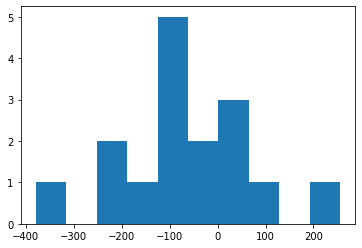

In [46]:
plt.hist(y_remains)

In [43]:
y_remains_abs = abs(y_test - y_pred)
y_remains_abs

50    255.660096
30     83.097037
44     53.695934
13    124.896761
26     66.250310
40      2.402343
19    379.076637
2     231.232391
16     18.651413
5     121.058718
41    112.297864
8      42.058718
43    220.519779
21      5.258994
27    178.920882
51    111.154514
Name: mortality, dtype: float64

(array([3., 3., 3., 2., 1., 1., 2., 0., 0., 1.]),
 array([  2.40234339,  40.06977272,  77.73720205, 115.40463138,
        153.07206071, 190.73949004, 228.40691937, 266.0743487 ,
        303.74177802, 341.40920735, 379.07663668]),
 <BarContainer object of 10 artists>)

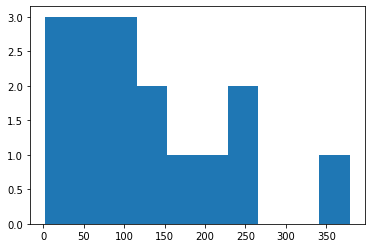

In [44]:
plt.hist(y_remains_abs)

### Что то совсем непонятное, попробую еще одним способом

In [37]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [38]:
X_const = sm.add_constant(X_train)

In [40]:
model_stsm = sm.OLS(y_train, X_const)
results = model_stsm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     47.24
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.97e-08
Time:                        16:08:35   Log-Likelihood:                -284.88
No. Observations:                  45   AIC:                             573.8
Df Residuals:                      43   BIC:                             577.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1715.4061     33.945     50.534      0.0

(array([1., 4., 8., 6., 3., 9., 3., 8., 1., 2.]),
 array([-276.66933149, -218.93521707, -161.20110265, -103.46698823,
         -45.73287381,   12.00124061,   69.73535503,  127.46946945,
         185.20358387,  242.93769829,  300.67181271]),
 <BarContainer object of 10 artists>)

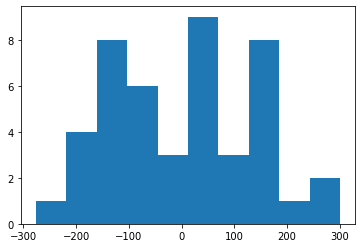

In [41]:
plt.hist(results.resid)

### Слишком большие отклонения от нормального распределения, больше на синусоиду похоже. Скорее всего модель неэффективна

## Подскажите пожалуста почему гистаграммы остатков получились разные

## Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [51]:
death_water_north = death_water.loc[death_water['location'] == 'North']

In [53]:
death_water_south = death_water.loc[death_water['location'] == 'South']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

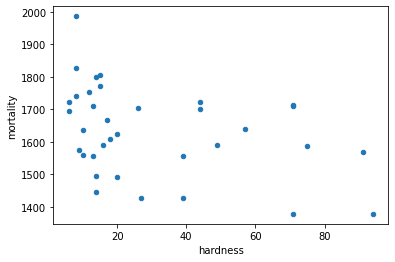

In [54]:
death_water_north.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

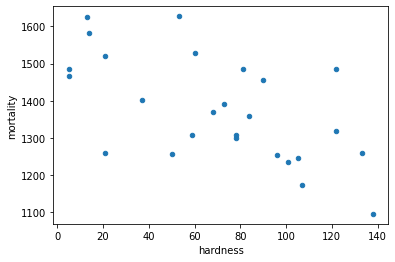

In [55]:
death_water_south.plot(kind='scatter', x='hardness', y='mortality')

### Характер разброса немного отличный но зависимость в чем то похожая

In [56]:
death_water_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [57]:
death_water_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [59]:
death_water_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [58]:
death_water_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


### А вот тут более ощутимые различия, в южном регионе корелляция намного более устойчива чем в северном

0.09294243977719119


(array([5., 2., 3., 2., 3., 4., 4., 2., 0., 1.]),
 array([-215.57181552, -162.39738674, -109.22295796,  -56.04852919,
          -2.87410041,   50.30032837,  103.47475714,  156.64918592,
         209.8236147 ,  262.99804348,  316.17247225]),
 <BarContainer object of 10 artists>)

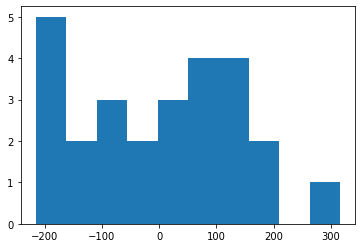

In [63]:
X = death_water_north[['hardness']]
y = death_water_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

X_const = sm.add_constant(X_train)
model_stsm = sm.OLS(y_train, X_const)
results = model_stsm.fit()
plt.hist(results.resid)

0.4152678635992815


(array([1., 1., 4., 1., 4., 3., 0., 1., 3., 1.]),
 array([-183.33117795, -145.95410024, -108.57702253,  -71.19994482,
         -33.8228671 ,    3.55421061,   40.93128832,   78.30836603,
         115.68544374,  153.06252145,  190.43959916]),
 <BarContainer object of 10 artists>)

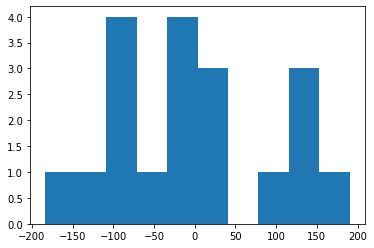

In [62]:
X = death_water_south[['hardness']]
y = death_water_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

X_const = sm.add_constant(X_train)
model_stsm = sm.OLS(y_train, X_const)
results = model_stsm.fit()
plt.hist(results.resid)

### Забавно, а по отдельности коэффициент детерминации положительный. Для южного региона модель хотя бы немного может предсказывать, для северной ощутимых шансов нет. Но гистаграммы остатков этих моделей не в ладах с нормальным распределением, поэтому я не доверяю не одной из них